In [1]:
import boto3
import geopandas as gpd

#### get shapefiles from s3 bucket

In [2]:
SHAPEFILE_BUCKET = 'usgswildfires/shapefile'

COUNTY_KEY = 'original-county.zip'
STATE_KEY = 'original-state.zip'
DIVISION_KEY = 'original-division.zip'

#### load and plot the geodataframe as is

In [3]:
county_df = gpd.read_file(f'zip+s3://{SHAPEFILE_BUCKET}/{COUNTY_KEY}')
county_df.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."


<AxesSubplot:>

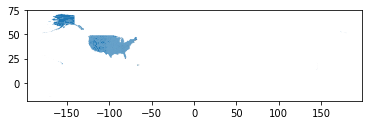

In [4]:
county_df.plot()

In [5]:
state_df = gpd.read_file(f'zip+s3://{SHAPEFILE_BUCKET}/{STATE_KEY}')
state_df.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,66,01802705,0400000US66,66,GU,Guam,00,543555847,934337453,"MULTIPOLYGON (((144.64538 13.23627, 144.64716 ..."
1,48,01779801,0400000US48,48,TX,Texas,00,676680588914,18979352230,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."


<AxesSubplot:>

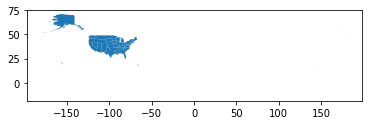

In [6]:
state_df.plot()

In [7]:
div_df = gpd.read_file(f'zip+s3://{SHAPEFILE_BUCKET}/{DIVISION_KEY}')
div_df.head(2)

,DIVISIONCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry
0,5,0300000US5,5,South Atlantic,South Atlantic Division,69,687125298338,86339601557,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
1,3,0300000US3,3,East North Central,East North Central Division,69,629298010339,151248789139,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 ..."


<AxesSubplot:>

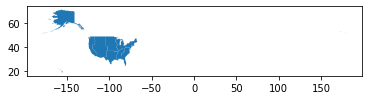

In [8]:
div_df.plot()

#### All the shapefiles contain the following *states*:
* Guam
* Puerto Rico
* Commonwealth of the Northern Mariana Islands
* American Samoa
* United States Virgin Islands
* District of Columbia

Since we do not have fire data for the above locations, we can omit them from the geodb's. This also helps the plotted boundaries *look* better

In [9]:
# filter the state geodataframe
state_df = state_df[(state_df.NAME != 'Guam') & (state_df.NAME != 'Puerto Rico') 
                     & (state_df.NAME != 'Commonwealth of the Northern Mariana Islands')
                     & (state_df.NAME != 'American Samoa') & (state_df.NAME != 'United States Virgin Islands')
                     & (state_df.NAME != 'District of Columbia')]

# filter the county geodataframe
county_df = county_df[(county_df.STATE_NAME != 'Guam') & (county_df.STATE_NAME != 'Puerto Rico')
                     & (county_df.STATE_NAME != 'Commonwealth of the Northern Mariana Islands')
                     & (county_df.STATE_NAME != 'American Samoa') & (county_df.STATE_NAME != 'United States Virgin Islands')
                     * (county_df.STATE_NAME != 'District of Columbia')]

Also, we want to subset to just US mainland (contiguous US) to help the plots render better. We can save separate files for Hawaii and Alaska, nonetheless.

In [10]:
# filter the div geodataframe to remove pacific
contig_div_df = div_df[div_df.NAME != 'Pacific']

# filter the state and county geodataframe to 
contig_state_df = state_df[(state_df.NAME != 'Alaska') & (state_df.NAME != 'Hawaii')]
contig_county_df = county_df[(county_df.STATE_NAME != 'Alaska') & (county_df.STATE_NAME != 'Hawaii')]

#### plot filtered geodataframe to see difference

<AxesSubplot:>

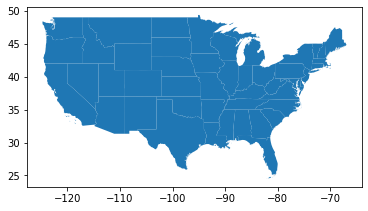

In [11]:
contig_state_df.plot()

<AxesSubplot:>

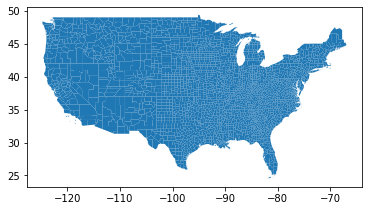

In [12]:
contig_county_df.plot()

<AxesSubplot:>

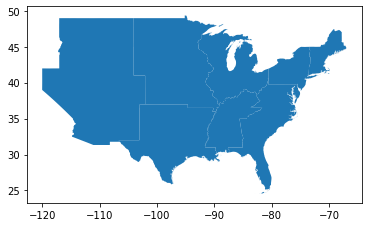

In [13]:
contig_div_df.plot()

In [14]:
type(contig_state_df[contig_state_df.NAME == 'California'].boundary)

geopandas.geoseries.GeoSeries

#### now we can save the geodataframes as shapefiles, which I will zip locally and place in the s3 bucket

In [15]:
import os

os.makedirs('state', exist_ok=True)
os.makedirs('contiguous-state', exist_ok=True)
os.makedirs('county', exist_ok=True)
os.makedirs('contiguous-county', exist_ok=True)
os.makedirs('contiguous-division', exist_ok=True)

##### states

In [16]:
state_df.to_file('state/state.shp')
contig_state_df.to_file('contiguous-state/contiguous-state.shp')  

##### counties

In [17]:
county_df.to_file('county/county.shp')
contig_county_df.to_file('contiguous-county/contiguous-county.shp')

##### division

In [18]:
contig_div_df.to_file('contiguous-division/contiguous-division.shp')

In [19]:
contig_state_df = gpd.read_file('contiguous-state')

<AxesSubplot:>

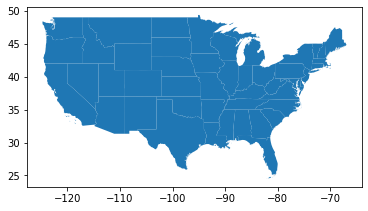

In [20]:
contig_state_df.plot()

<AxesSubplot:>

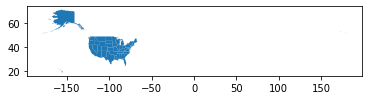

In [21]:
state_df.plot()

#### load from s3 bucket to ensure files are what we expect

<AxesSubplot:>

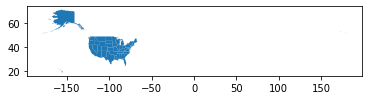

In [22]:
s3state_df = gpd.read_file('zip+s3://usgswildfires/shapefile/state.zip')
s3state_df.plot()

<AxesSubplot:>

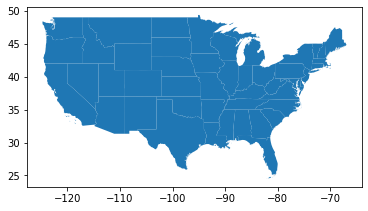

In [23]:
s3contig_state_df = gpd.read_file('zip+s3://usgswildfires/shapefile/contiguous-state.zip')
s3contig_state_df.plot()

<AxesSubplot:>

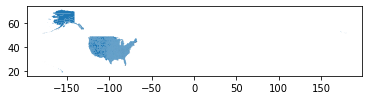

In [24]:
s3county_df = gpd.read_file('zip+s3://usgswildfires/shapefile/county.zip')
s3county_df.plot()

<AxesSubplot:>

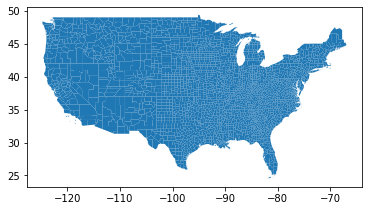

In [25]:
s3contig_county_df = gpd.read_file('zip+s3://usgswildfires/shapefile/contiguous-county.zip')
s3contig_county_df.plot()

<AxesSubplot:>

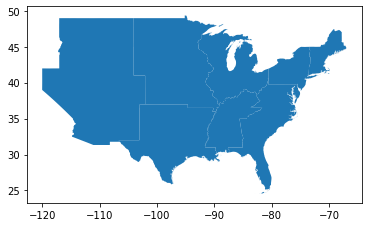

In [26]:
s3contig_div_df = gpd.read_file('zip+s3://usgswildfires/shapefile/contiguous-division.zip')
s3contig_div_df.plot()

## looks good !